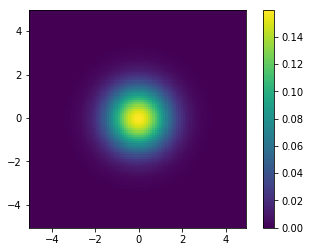

In [1]:
# Add my own libraries to the path
import sys
sys.path.append('/Users/Mead/Physics/library/python')

# Import statements
import numpy as np
import mead_statistics as statistics
from matplotlib import pyplot as plt

# Inline plots
%matplotlib inline

# Parameters
n = 1000000 # Number of random draws
m = 101 # Number of bins

# Define a normalised 2D Gaussian
def Gaussian(x,y):
    fx = np.exp(-x**2/2.)
    fy = np.exp(-y**2/2.)
    A = 1./(2.*np.pi)
    return A*fx*fy

# Set range for plot
rmin = -5. # Minimum x,y value in terms of sigma 
rmax = 5. # Maximum x,y value in terms of sigma 
x = np.linspace(rmin,rmax,m) # Create array of x values
dx = (rmax-rmin)/np.real(m) # Pixel size
y, dy = x, dx # y is the same as x
X,Y = np.meshgrid(x,y) # Necessary to make 2D plot
Z = Gaussian(X,Y) # Make Z array with Gaussian

# Plot
fig, ax = plt.subplots()
p = plt.pcolor(x-dx/2.,y-dy/2.,Z) # dx/2 necessary because otherwise x,y interpreted as pixel corners
plt.xlim((rmin,rmax))
plt.ylim((rmin,rmax))
plt.axis('scaled')
cb = fig.colorbar(p)
plt.show()

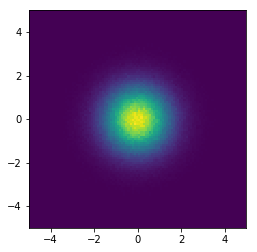

In [2]:
# Draw x and y independently
xs = np.random.normal(size=n)
ys = np.random.normal(size=n)

# Plot
fig, ax = plt.subplots()
plt.hist2d(xs,ys,bins=m,range=[[rmin,rmax],[rmin,rmax]],normed=True)
plt.axis('scaled')
plt.show()

In [3]:
# Make a new array of XY pairs to get all combinations (something like an outer product)
#XY = np.array(np.meshgrid(x,y))
#print('Number of bins:', m)
#print('Type of XY:', type(XY))
#print('Size of XY:', XY.size) # Should be 2*m**2
#print('Shape of XY:', XY.shape) # Should be (2,m,m)
#print('Element [:,0,0]:', XY[:,0,0])
#print('Element [:,0,1]:', XY[:,0,1])
#print()

# Reshape the XY grid array (2,m,m) to be a long array (2,m**2)
#XY = XY.reshape(2,m**2)
#XY = np.transpose(XY) # Necesarry for some reason
#print('Type of XY:', type(XY))
#print('Number of bins:', m)
#print('Size of XY:', XY.size) # Should be 2*m**2
#print('Shape of XY:', XY.shape) # Should be (2,m**2)
#print('Element [0,:]:', XY[0,:])
#print('Element [1,:]:', XY[1,:])
#print()

# Convert to a list which is now coordinates corresponding to position in flattened Gaussian list (below)
#XY = XY.tolist()
#print('Type of XY:', type(XY))
#print('Number of bins:', m)
#print('Element [0]:', XY[0])
#print('Element [1]:', XY[1])
#print()

# Flatten the Gaussian array such that coordinates correspond to probabilities for the Gaussian
#Z=Z.flatten()
#print('Type of Z:', type(Z))
#print('Size of Z:', Z.size)
#print('Shape of Z:', Z.shape)
#print('Sum of Z:', sum(Z))
#print()
#Z=Z/sum(Z) # Force normalisation

# Make a list of integers
#i = list(range(Z.size))

# Make the random choices with Gaussian probabilties
#j = np.random.choice(i,n,replace=True,p=Z)

# Use the coordinate set j to link to actual coordinates in x, y
#xs = []
#ys = []
#for i in range(n):
#    xi,yi = XY[j[i]]
#    #print(i,xi,yi)
#    xs.append(xi)
#    ys.append(yi)

# Plot
#fig, ax = plt.subplots()
#plt.hist2d(xs,ys, bins=m, range=[[rmin,rmax],[rmin,rmax]])
#plt.axis('scaled')
#plt.show()

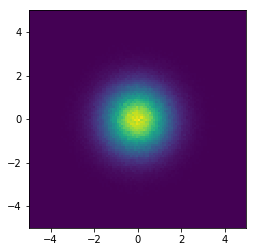

In [4]:
# Use my draw from 2D function
xs,ys = statistics.draw_from_2D(n,Gaussian,rmin,rmax,m,rmin,rmax,m)

# Plot
fig, ax = plt.subplots()
plt.hist2d(xs,ys,bins=m,range=[[rmin,rmax],[rmin,rmax]],normed=True)
plt.axis('scaled')
plt.show()